In [17]:
import pandas as pd

df=pd.read_csv(r"dataset_final.csv")
del df['Unnamed: 0']
df

,행정동_코드,분기당_매출_금액,분기당_매출_건수,"환산임대료(원, 21년도)",개인사업자_수,점포수,프랜차이즈_점포_수,2021년_2030여성_비율평균,문화시설수,지하철_역_수,전체_카페_점포_수,개인카페_점포수
0,11110515,5.468560e+08,39024.967740,141341,119,481,8,0.0368,10,0,43,41
1,11110515,4.187615e+07,2659.750000,141341,119,481,8,0.0368,10,0,1,1
2,11110515,1.188122e+08,4828.333333,141341,119,481,8,0.0368,10,0,3,3
3,11110515,4.797701e+08,13574.750000,141341,119,481,8,0.0368,10,0,6,5
4,11110530,5.634570e+07,7114.250000,138422,885,1081,139,0.0505,21,2,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1236,11740685,1.966073e+09,158017.500000,98924,548,1700,140,0.0370,1,1,49,31
1237,11740700,6.723212e+08,50575.583330,87738,146,785,23,0.0337,0,0,22,19
1238,11740700,2.531951e+08,16444.941180,87738,146,785,23,0.0337,0,0,9,6
1239,11740700,4.980934e+07,5123.227273,87738,146,785,23,0.0337,0,0,4,3


In [18]:
df.info() #데이터에 대한 정보 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   행정동_코드             1241 non-null   int64  
 1   분기당_매출_금액          1241 non-null   float64
 2   분기당_매출_건수          1241 non-null   float64
 3   환산임대료(원, 21년도)     1241 non-null   int64  
 4   개인사업자_수            1241 non-null   int64  
 5   점포수                1241 non-null   int64  
 6   프랜차이즈_점포_수         1241 non-null   int64  
 7   2021년_2030여성_비율평균  1241 non-null   float64
 8   문화시설수              1241 non-null   int64  
 9   지하철_역_수            1241 non-null   int64  
 10  전체_카페_점포_수         1241 non-null   int64  
 11  개인카페_점포수           1241 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 116.5 KB


In [19]:
df.describe() #컬럼별 요약통계량 확인

,행정동_코드,분기당_매출_금액,분기당_매출_건수,"환산임대료(원, 21년도)",개인사업자_수,점포수,프랜차이즈_점포_수,2021년_2030여성_비율평균,문화시설수,지하철_역_수,전체_카페_점포_수,개인카페_점포수
count,1.241000e+03,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,1.143724e+07,5.807483e+08,43730.413388,115368.795326,322.030620,991.428687,73.480258,0.043452,4.501209,0.877518,17.495568,12.581789
std,1.913937e+05,9.535686e+08,70060.191314,32208.316438,382.630866,794.549902,85.355394,0.010360,11.043910,1.191158,28.700683,19.579531
min,1.111052e+07,1.162300e+06,127.750000,59814.000000,6.000000,92.000000,0.000000,0.023000,0.000000,0.000000,0.000000,0.000000
25%,1.126061e+07,1.671824e+08,12624.928570,94385.000000,108.000000,536.000000,22.000000,0.035800,0.000000,0.000000,4.000000,3.000000
50%,1.144068e+07,2.981442e+08,24019.812500,109196.000000,196.000000,771.000000,43.000000,0.041300,1.000000,0.000000,9.000000,7.000000
75%,1.162052e+07,5.488990e+08,43800.791670,128348.000000,380.000000,1164.000000,93.000000,0.049700,4.000000,1.000000,17.000000,14.000000
max,1.174070e+07,1.178592e+10,975844.388900,369515.000000,2579.000000,5445.000000,430.000000,0.082100,114.000000,6.000000,292.000000,242.000000


In [20]:
#pearson이용 상관분석
cols=["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수", 
      "2021년_2030여성_비율평균",'문화시설수',"지하철_역_수","전체_카페_점포_수","개인카페_점포수"] #숫자형들만 모아서 계산

corr=df[cols].corr(method='pearson')
#corr_1=corr['분기당_매출_금액']>=0.4   #선형회귀를 위해 값이 0.4이상인 관계가 높은 것들만 추출
corr

,분기당_매출_금액,분기당_매출_건수,"환산임대료(원, 21년도)",개인사업자_수,점포수,프랜차이즈_점포_수,2021년_2030여성_비율평균,문화시설수,지하철_역_수,전체_카페_점포_수,개인카페_점포수
분기당_매출_금액,1.000000,0.949536,0.225129,0.408697,0.319777,0.462203,0.242781,0.185562,0.297392,0.899626,0.821790
분기당_매출_건수,0.949536,1.000000,0.199533,0.362248,0.290726,0.443692,0.235141,0.153045,0.277289,0.887252,0.793093
"환산임대료(원, 21년도)",0.225129,0.199533,1.000000,0.315258,0.398196,0.330815,0.377164,0.299615,0.296339,0.223582,0.217641
개인사업자_수,0.408697,0.362248,0.315258,1.000000,0.843190,0.909357,0.590842,0.465283,0.569085,0.445604,0.470526
점포수,0.319777,0.290726,0.398196,0.843190,1.000000,0.795354,0.498412,0.389459,0.438219,0.332895,0.351308
프랜차이즈_점포_수,0.462203,0.443692,0.330815,0.909357,0.795354,1.000000,0.578860,0.411596,0.566402,0.465219,0.441985
2021년_2030여성_비율평균,0.242781,0.235141,0.377164,0.590842,0.498412,0.578860,1.000000,0.372873,0.336397,0.300873,0.326719
문화시설수,0.185562,0.153045,0.299615,0.465283,0.389459,0.411596,0.372873,1.000000,0.247433,0.230396,0.241222
지하철_역_수,0.297392,0.277289,0.296339,0.569085,0.438219,0.566402,0.336397,0.247433,1.000000,0.309642,0.306796
전체_카페_점포_수,0.899626,0.887252,0.223582,0.445604,0.332895,0.465219,0.300873,0.230396,0.309642,1.000000,0.970380


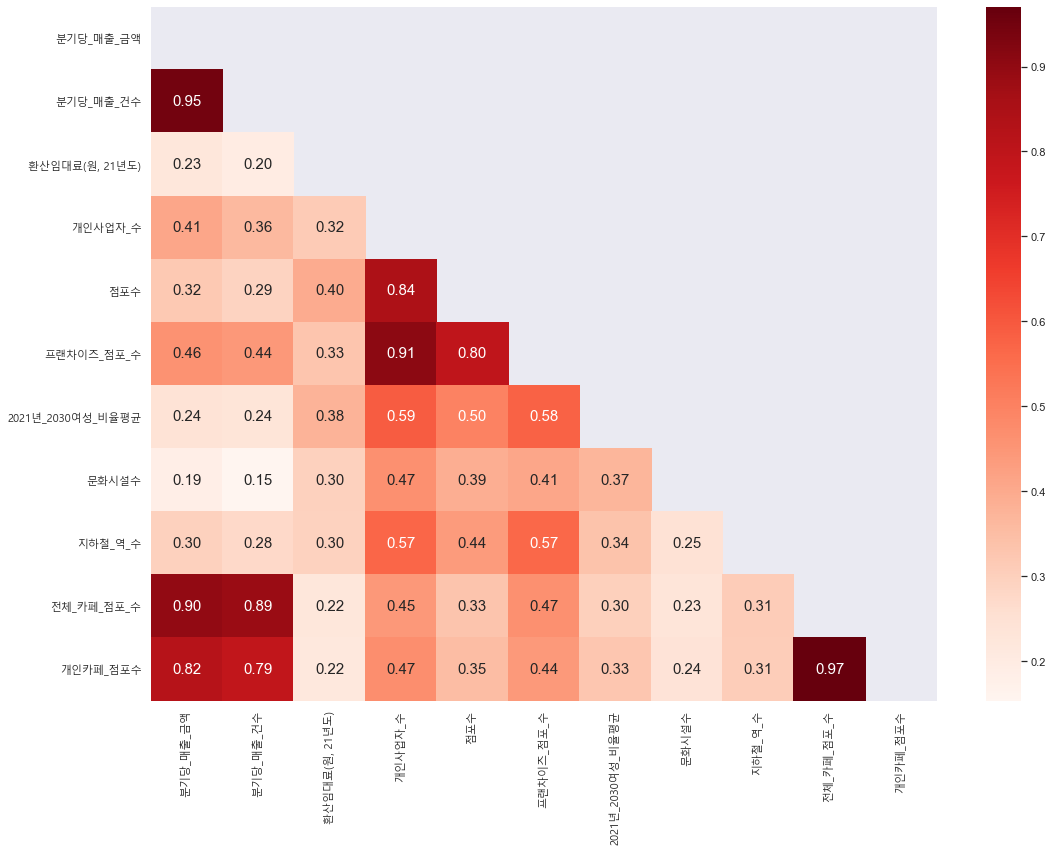

In [21]:
#heatmap(seaborn) 상관분석
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

mask = np.triu(np.ones_like(corr)) #matrix를 상삼각행렬로 만들어 heatmap 보기 편하게 만듦.

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False   #한글깨짐해결용 코드

fig=plt.figure(figsize=(16,12))
ax=fig.gca()

sns.set(font_scale=1.0) #heatmap 안의 font-size설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "Reds", mask=mask)

plt.tight_layout()
plt.show()

In [22]:
#P값 구하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
import researchpy as rp
from scipy import stats

#수치형만 남기기위해
dt=df[['행정동_코드',"분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수", 
      "2021년_2030여성_비율평균",'문화시설수',"지하철_역_수","전체_카페_점포_수","개인카페_점포수"]]
dk=dt.set_index('행정동_코드') #index를 행정동코드로 만들어주어서 행정동코드 기준으로  계산되도록 만듦.
dk

,분기당_매출_금액,분기당_매출_건수,"환산임대료(원, 21년도)",개인사업자_수,점포수,프랜차이즈_점포_수,2021년_2030여성_비율평균,문화시설수,지하철_역_수,전체_카페_점포_수,개인카페_점포수
행정동_코드,,,,,,,,,,,
11110515,5.468560e+08,39024.967740,141341,119,481,8,0.0368,10,0,43,41
11110515,4.187615e+07,2659.750000,141341,119,481,8,0.0368,10,0,1,1
11110515,1.188122e+08,4828.333333,141341,119,481,8,0.0368,10,0,3,3
11110515,4.797701e+08,13574.750000,141341,119,481,8,0.0368,10,0,6,5
11110530,5.634570e+07,7114.250000,138422,885,1081,139,0.0505,21,2,6,5
...,...,...,...,...,...,...,...,...,...,...,...
11740685,1.966073e+09,158017.500000,98924,548,1700,140,0.0370,1,1,49,31
11740700,6.723212e+08,50575.583330,87738,146,785,23,0.0337,0,0,22,19
11740700,2.531951e+08,16444.941180,87738,146,785,23,0.0337,0,0,9,6


In [23]:
#변수 간의 상관계수와 관련 p값을 계산
np.corrcoef(dk)
corr=dk.corr(method='pearson')
print(corr)
dd=rp.corr_pair(df[["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수", 
      "2021년_2030여성_비율평균",'문화시설수',"지하철_역_수","전체_카페_점포_수","개인카페_점포수"]])
dd

                   분기당_매출_금액  분기당_매출_건수  환산임대료(원, 21년도)   개인사업자_수       점포수  \
분기당_매출_금액           1.000000   0.949536        0.225129  0.408697  0.319777   
분기당_매출_건수           0.949536   1.000000        0.199533  0.362248  0.290726   
환산임대료(원, 21년도)      0.225129   0.199533        1.000000  0.315258  0.398196   
개인사업자_수             0.408697   0.362248        0.315258  1.000000  0.843190   
점포수                 0.319777   0.290726        0.398196  0.843190  1.000000   
프랜차이즈_점포_수          0.462203   0.443692        0.330815  0.909357  0.795354   
2021년_2030여성_비율평균   0.242781   0.235141        0.377164  0.590842  0.498412   
문화시설수               0.185562   0.153045        0.299615  0.465283  0.389459   
지하철_역_수             0.297392   0.277289        0.296339  0.569085  0.438219   
전체_카페_점포_수          0.899626   0.887252        0.223582  0.445604  0.332895   
개인카페_점포수            0.821790   0.793093        0.217641  0.470526  0.351308   

                   프랜차이즈_점포_수  2021년_2030여성_비율평균   

,r value,p-value,N
분기당_매출_금액 & 분기당_매출_건수,0.9495,0.0000,1241
"분기당_매출_금액 & 환산임대료(원, 21년도)",0.2251,0.0000,1241
분기당_매출_금액 & 개인사업자_수,0.4087,0.0000,1241
분기당_매출_금액 & 점포수,0.3198,0.0000,1241
분기당_매출_금액 & 프랜차이즈_점포_수,0.4622,0.0000,1241
분기당_매출_금액 & 2021년_2030여성_비율평균,0.2428,0.0000,1241
분기당_매출_금액 & 문화시설수,0.1856,0.0000,1241
분기당_매출_금액 & 지하철_역_수,0.2974,0.0000,1241
분기당_매출_금액 & 전체_카페_점포_수,0.8996,0.0000,1241
분기당_매출_금액 & 개인카페_점포수,0.8218,0.0000,1241


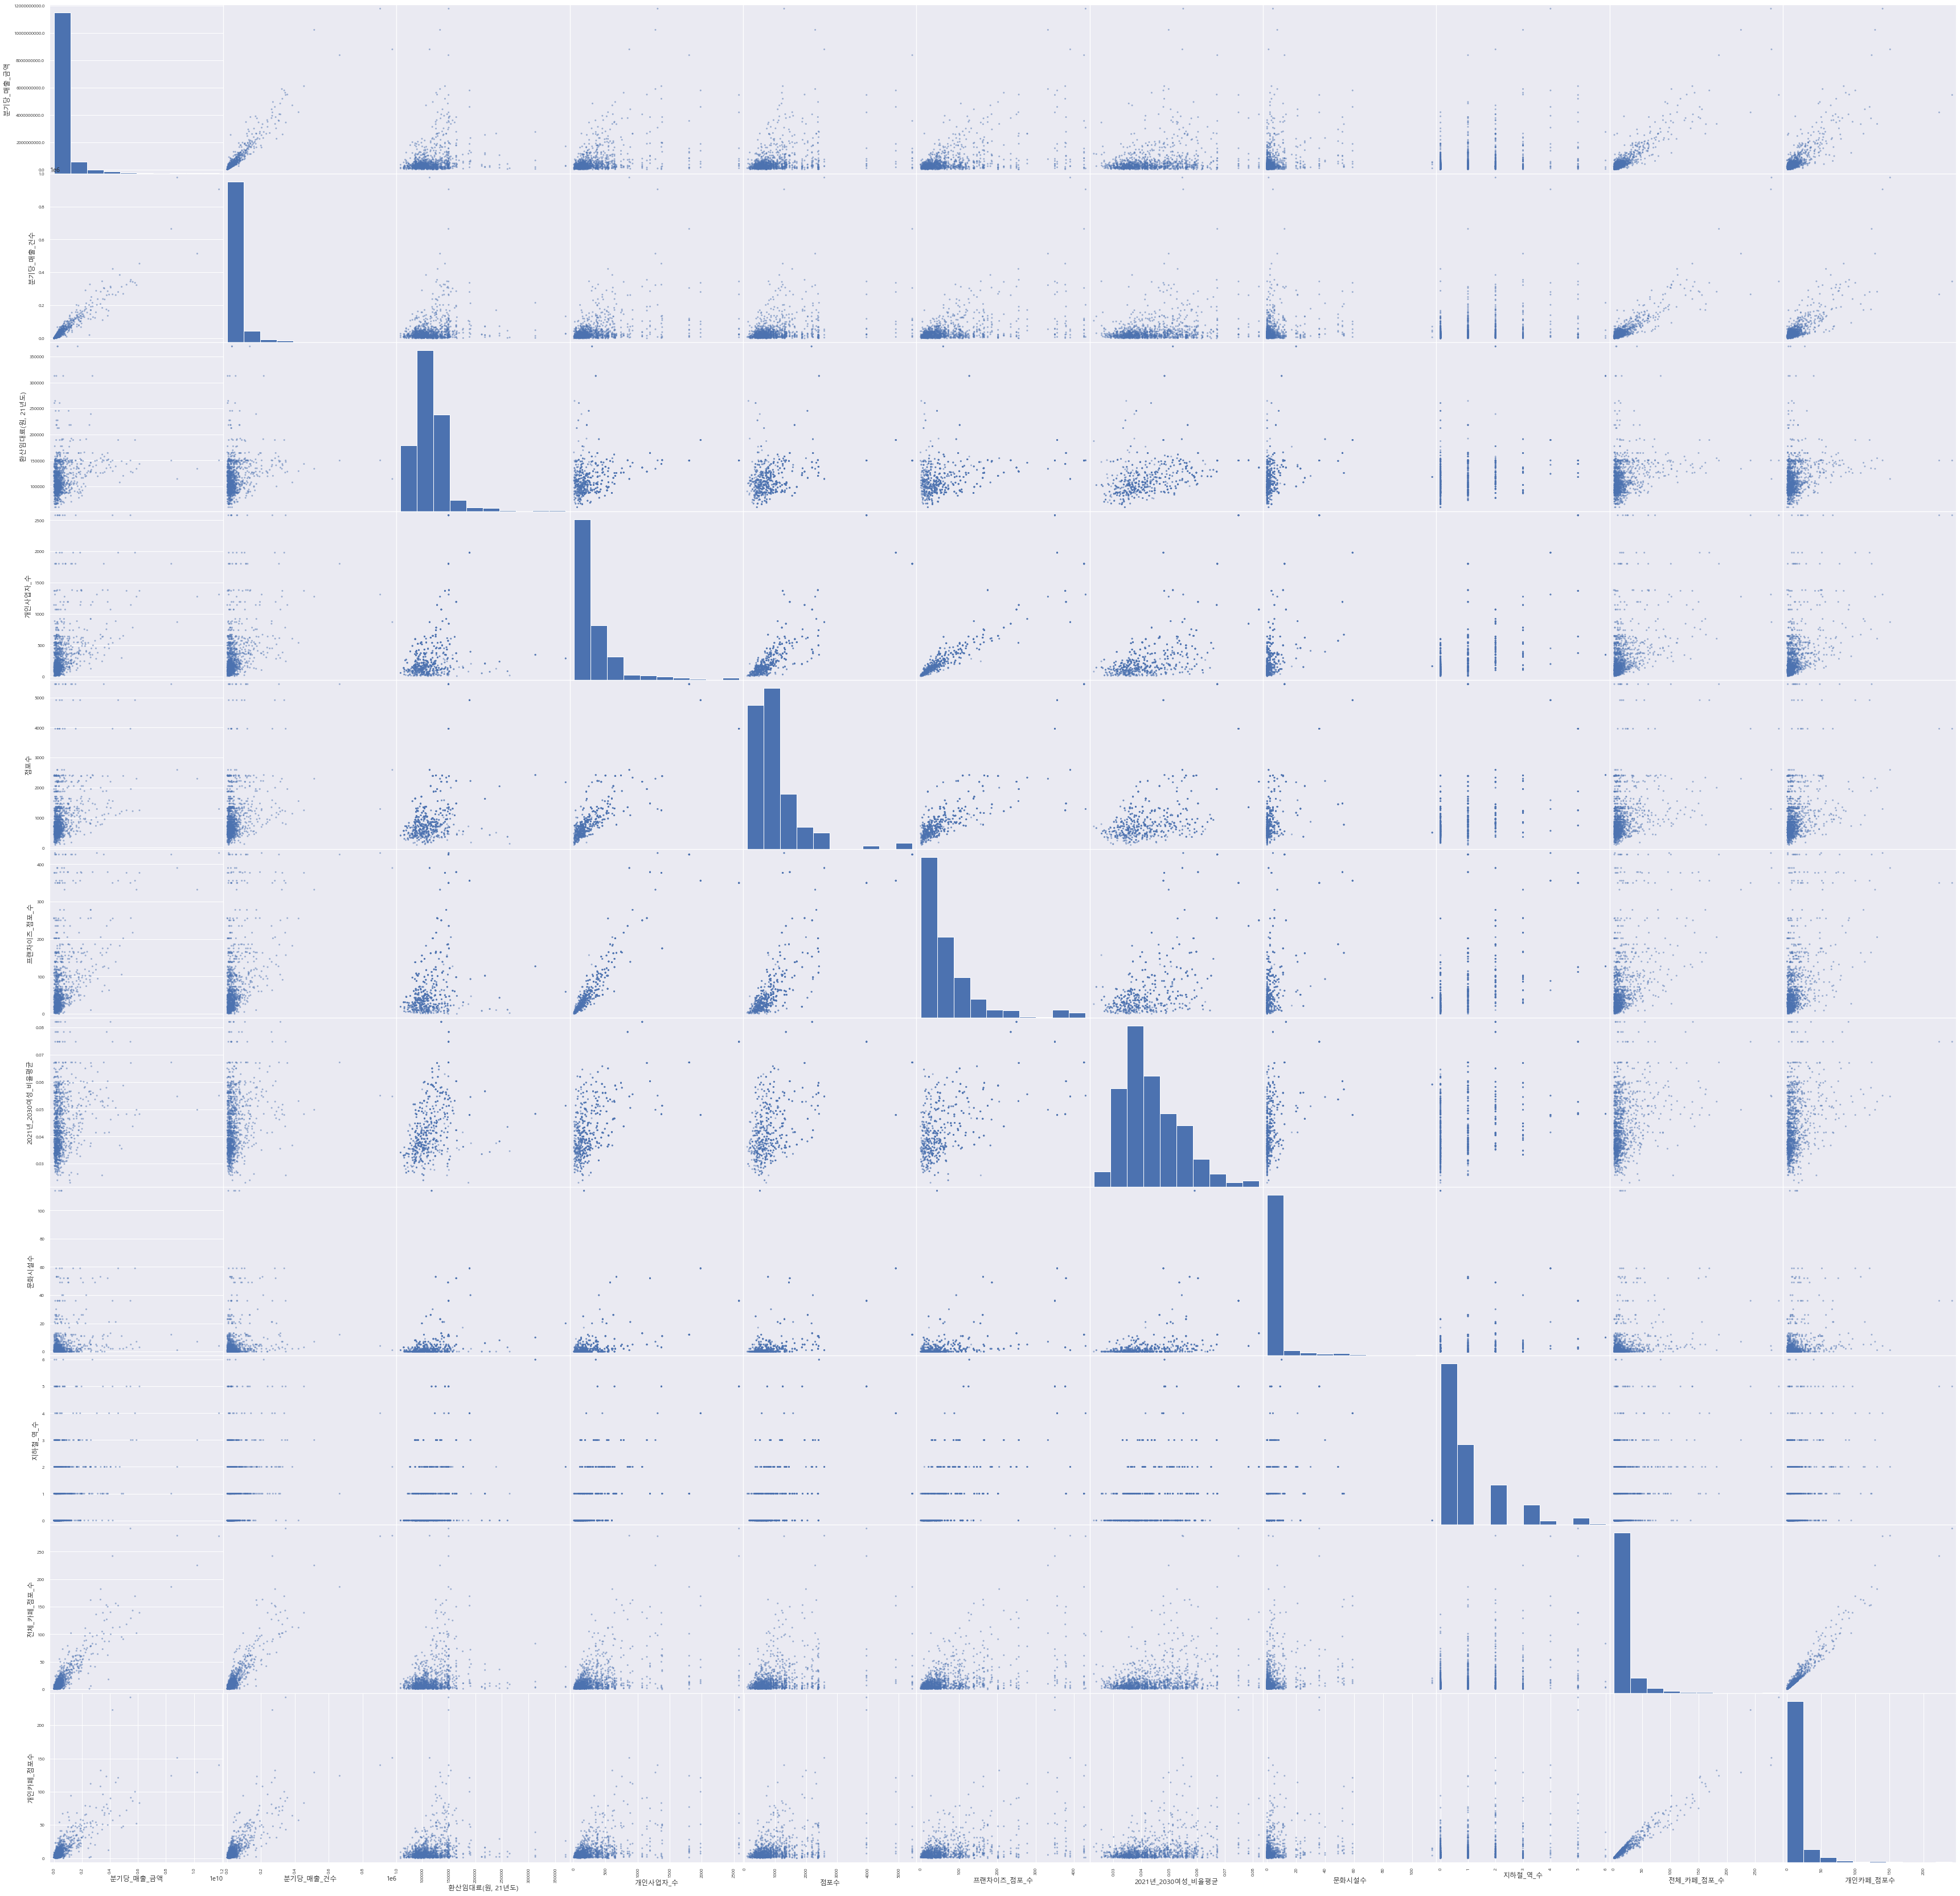

In [24]:
#plotting 그리기
from pandas.plotting import scatter_matrix
#scatter_matrix
plt.rc('font', family = 'malgun gothic')
%matplotlib inline
scatter_matrix(df[["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수", 
      "2021년_2030여성_비율평균",'문화시설수',"지하철_역_수","전체_카페_점포_수","개인카페_점포수"]],figsize=(60,60))
plt.show()